<a href="https://colab.research.google.com/github/Geek-a-Byte/ML-sessional/blob/main/lab2/teachers%20copy/LR_Single_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd


In [5]:
path_to_file = '/content/drive/MyDrive/CSE 442/dhaka_home_price.zip'
df = pd.read_csv(path_to_file)
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [7]:
df.head()

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000


In [8]:
df.shape

(10, 2)

In [9]:
df.columns

Index(['area', 'price'], dtype='object')

In [10]:
df.isnull().sum()

area     0
price    0
dtype: int64

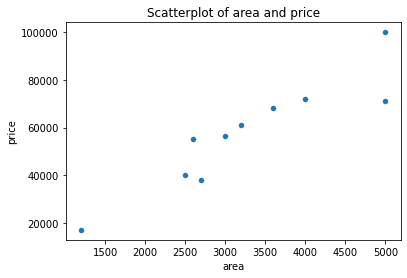

In [11]:
df.plot.scatter(x='area', y='price', title='Scatterplot of area and price');

In [12]:
y = df['price']
X = df['area']

In [13]:
X

0    2600
1    3000
2    3200
3    3600
4    4000
5    5000
6    2500
7    2700
8    1200
9    5000
Name: area, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
X_train

1    3000
7    2700
6    2500
8    1200
9    5000
5    5000
3    3600
0    2600
Name: area, dtype: int64

In [17]:
X_train.values.reshape(-1,1)

array([[3000],
       [2700],
       [2500],
       [1200],
       [5000],
       [5000],
       [3600],
       [2600]])

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [20]:
y_pred = regressor.predict(X_test.values.reshape(-1,1))

In [21]:
y_pred

array([[55687.5       ],
       [69928.58658744]])

In [22]:
print(regressor.intercept_)

[-1276.84634975]


In [23]:
print(regressor.coef_)

[[17.80135823]]


In [24]:
y_pred_test = regressor.predict(X_test.values.reshape(-1,1))

In [25]:
y_pred_all = regressor.predict(X.values.reshape(-1,1))

In [26]:
y_pred

array([[55687.5       ],
       [69928.58658744]])

In [27]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})

In [28]:
df_preds

,Actual,Predicted
2,61000,55687.500000
4,72000,69928.586587


In [29]:
import matplotlib.pyplot as plt

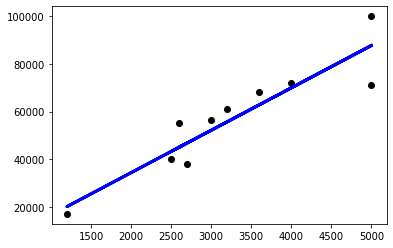

In [30]:
plt.scatter(X, y, color="black")
plt.plot(X, y_pred_all, color="blue", linewidth=3)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [33]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3691.96
Mean squared error: 16256704.89
Root mean squared error: 4031.96
